In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("college_student_management_data.csv")

In [3]:
df.head()

,student_id,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,S001,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,S002,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,S003,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,S004,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,S005,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


In [4]:
df.shape

(1545, 15)

In [5]:
df.columns

Index(['student_id', 'age', 'gender', 'major', 'GPA', 'course_load',
       'avg_course_grade', 'attendance_rate', 'enrollment_status',
       'lms_logins_past_month', 'avg_session_duration_minutes',
       'assignment_submission_rate', 'forum_participation_count',
       'video_completion_rate', 'risk_level'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    1545 non-null   object 
 1   age                           1545 non-null   int64  
 2   gender                        1545 non-null   object 
 3   major                         1545 non-null   object 
 4   GPA                           1545 non-null   float64
 5   course_load                   1545 non-null   int64  
 6   avg_course_grade              1545 non-null   float64
 7   attendance_rate               1545 non-null   float64
 8   enrollment_status             1545 non-null   object 
 9   lms_logins_past_month         1545 non-null   int64  
 10  avg_session_duration_minutes  1545 non-null   int64  
 11  assignment_submission_rate    1545 non-null   float64
 12  forum_participation_count     1545 non-null   int64  
 13  vid

In [7]:
df.describe()

,age,GPA,course_load,avg_course_grade,attendance_rate,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,21.482848,3.012324,4.487379,79.914887,0.794460,19.344984,49.365049,0.752201,9.642718,0.750958
std,2.300287,0.571395,1.098163,11.528625,0.115142,11.515003,23.195192,0.144351,5.752493,0.144840
min,18.000000,2.000000,3.000000,60.000000,0.600000,0.000000,10.000000,0.500000,0.000000,0.500000
25%,19.000000,2.520000,4.000000,69.900000,0.690000,10.000000,29.000000,0.630000,5.000000,0.620000
50%,22.000000,3.030000,5.000000,79.600000,0.790000,19.000000,49.000000,0.760000,10.000000,0.750000
75%,23.000000,3.510000,5.000000,89.700000,0.890000,29.000000,70.000000,0.880000,15.000000,0.880000
max,25.000000,4.000000,6.000000,100.000000,1.000000,39.000000,89.000000,1.000000,19.000000,1.000000


In [8]:
df.isnull().sum()

student_id                      0
age                             0
gender                          0
major                           0
GPA                             0
course_load                     0
avg_course_grade                0
attendance_rate                 0
enrollment_status               0
lms_logins_past_month           0
avg_session_duration_minutes    0
assignment_submission_rate      0
forum_participation_count       0
video_completion_rate           0
risk_level                      0
dtype: int64

In [9]:
#all null columns are add 

In [10]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
le=LabelEncoder()
for col in df.columns:
     if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

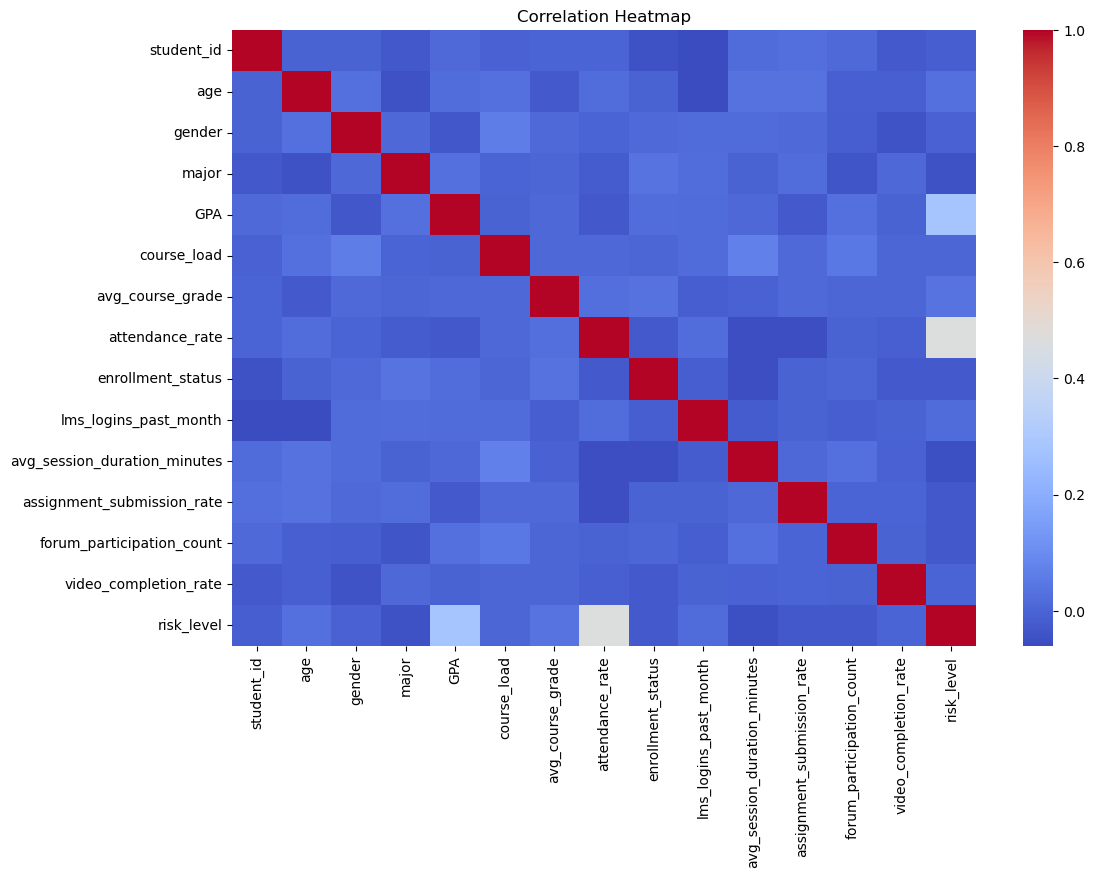

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
target_col=df.columns[-1]
target_col

'risk_level'

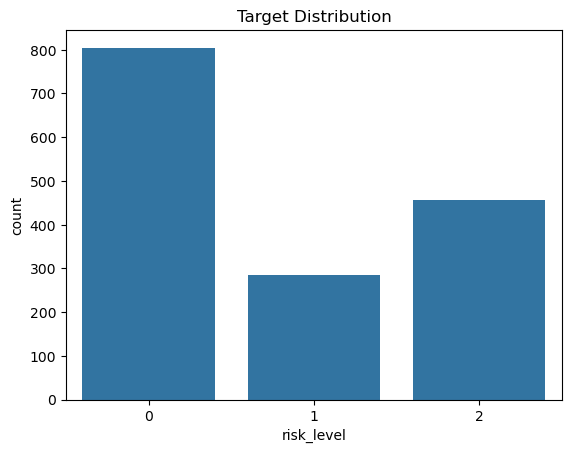

In [16]:
sns.countplot(x=df[target_col])
plt.title('Target Distribution')
plt.show()

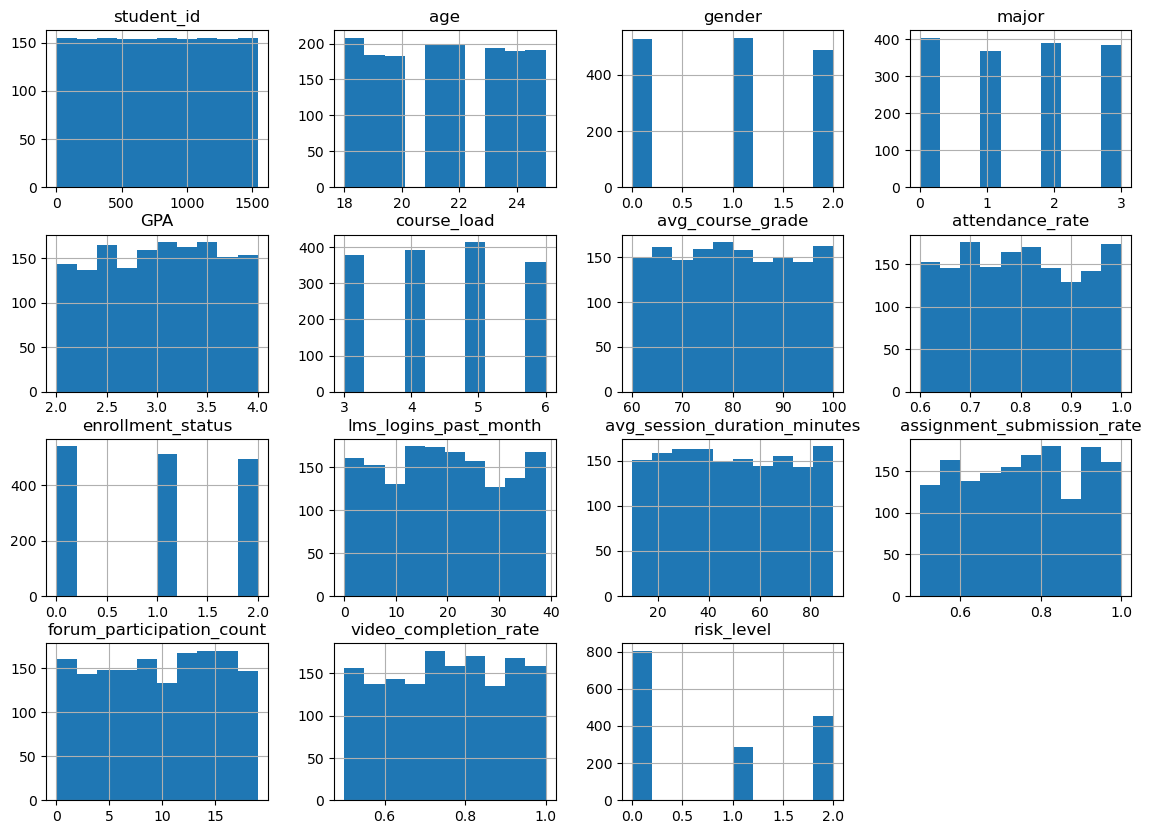

In [17]:
df.hist(figsize=(14,10))
plt.show()

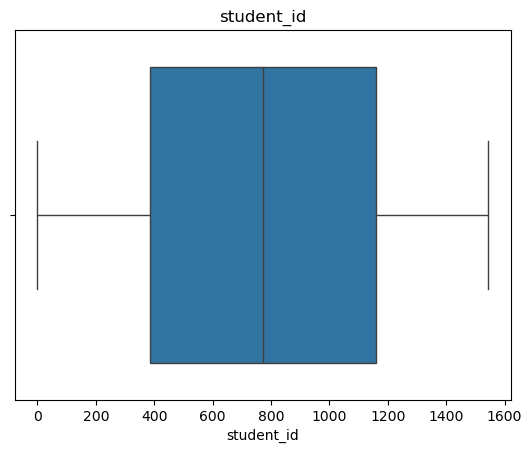

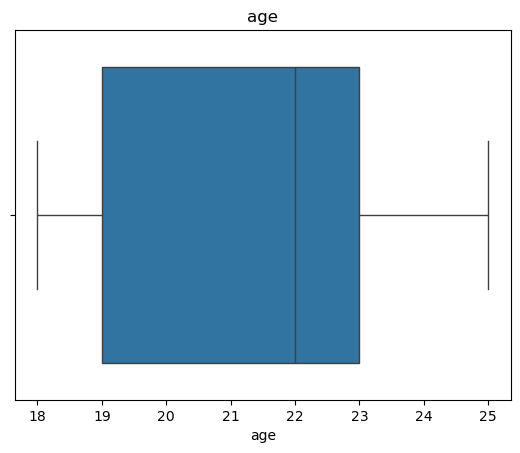

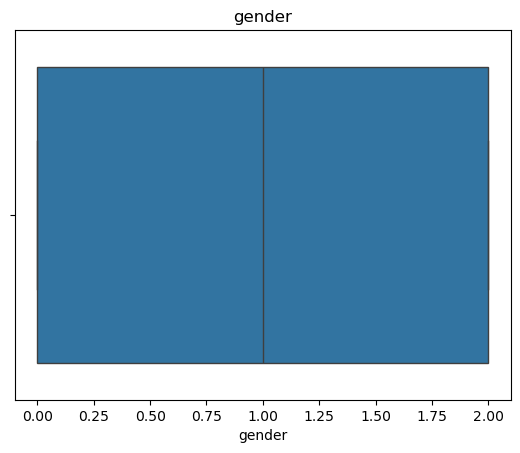

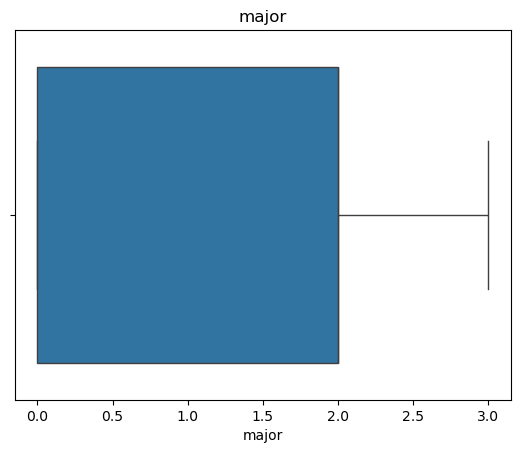

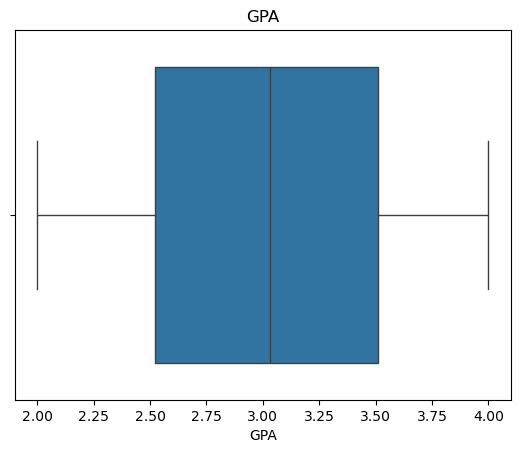

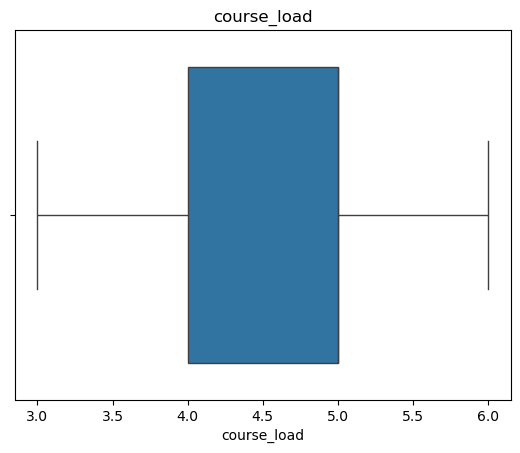

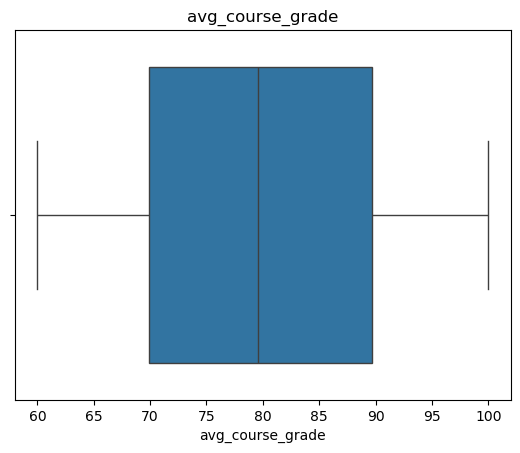

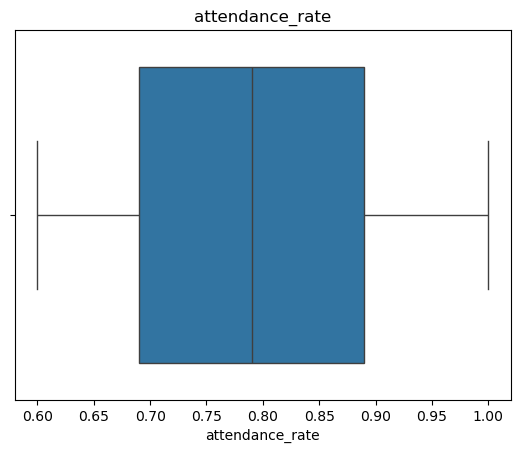

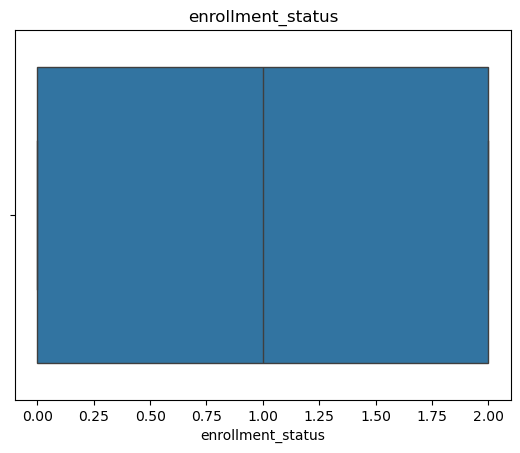

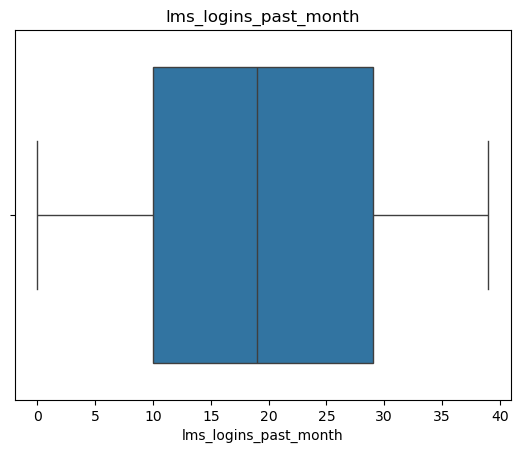

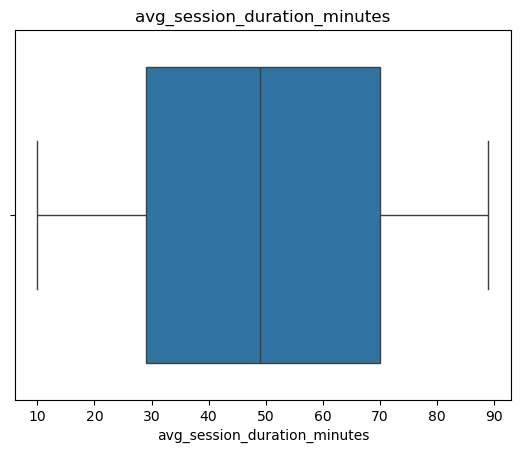

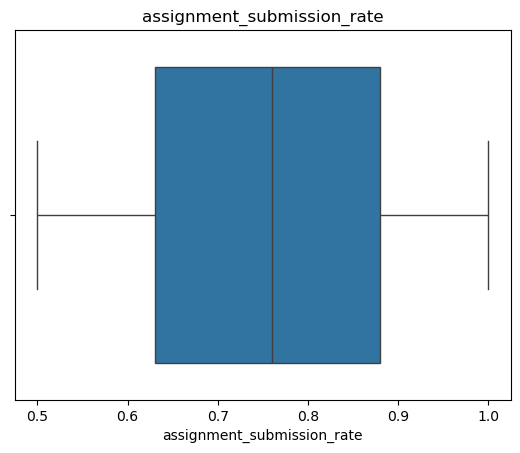

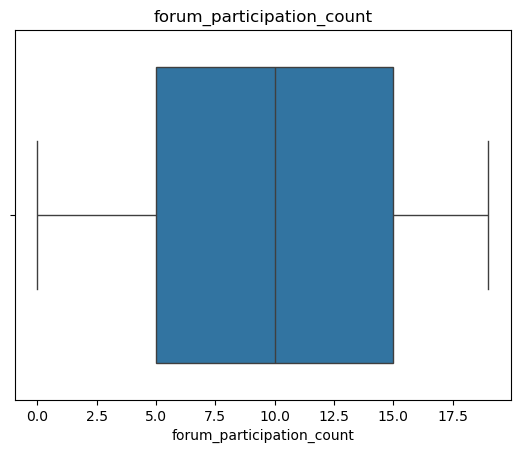

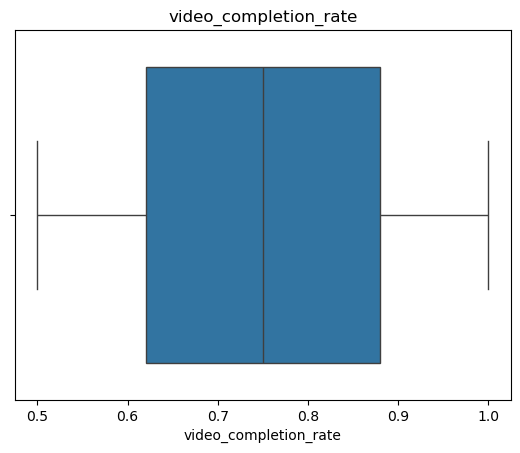

In [18]:
for col in df.columns[:-1]:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

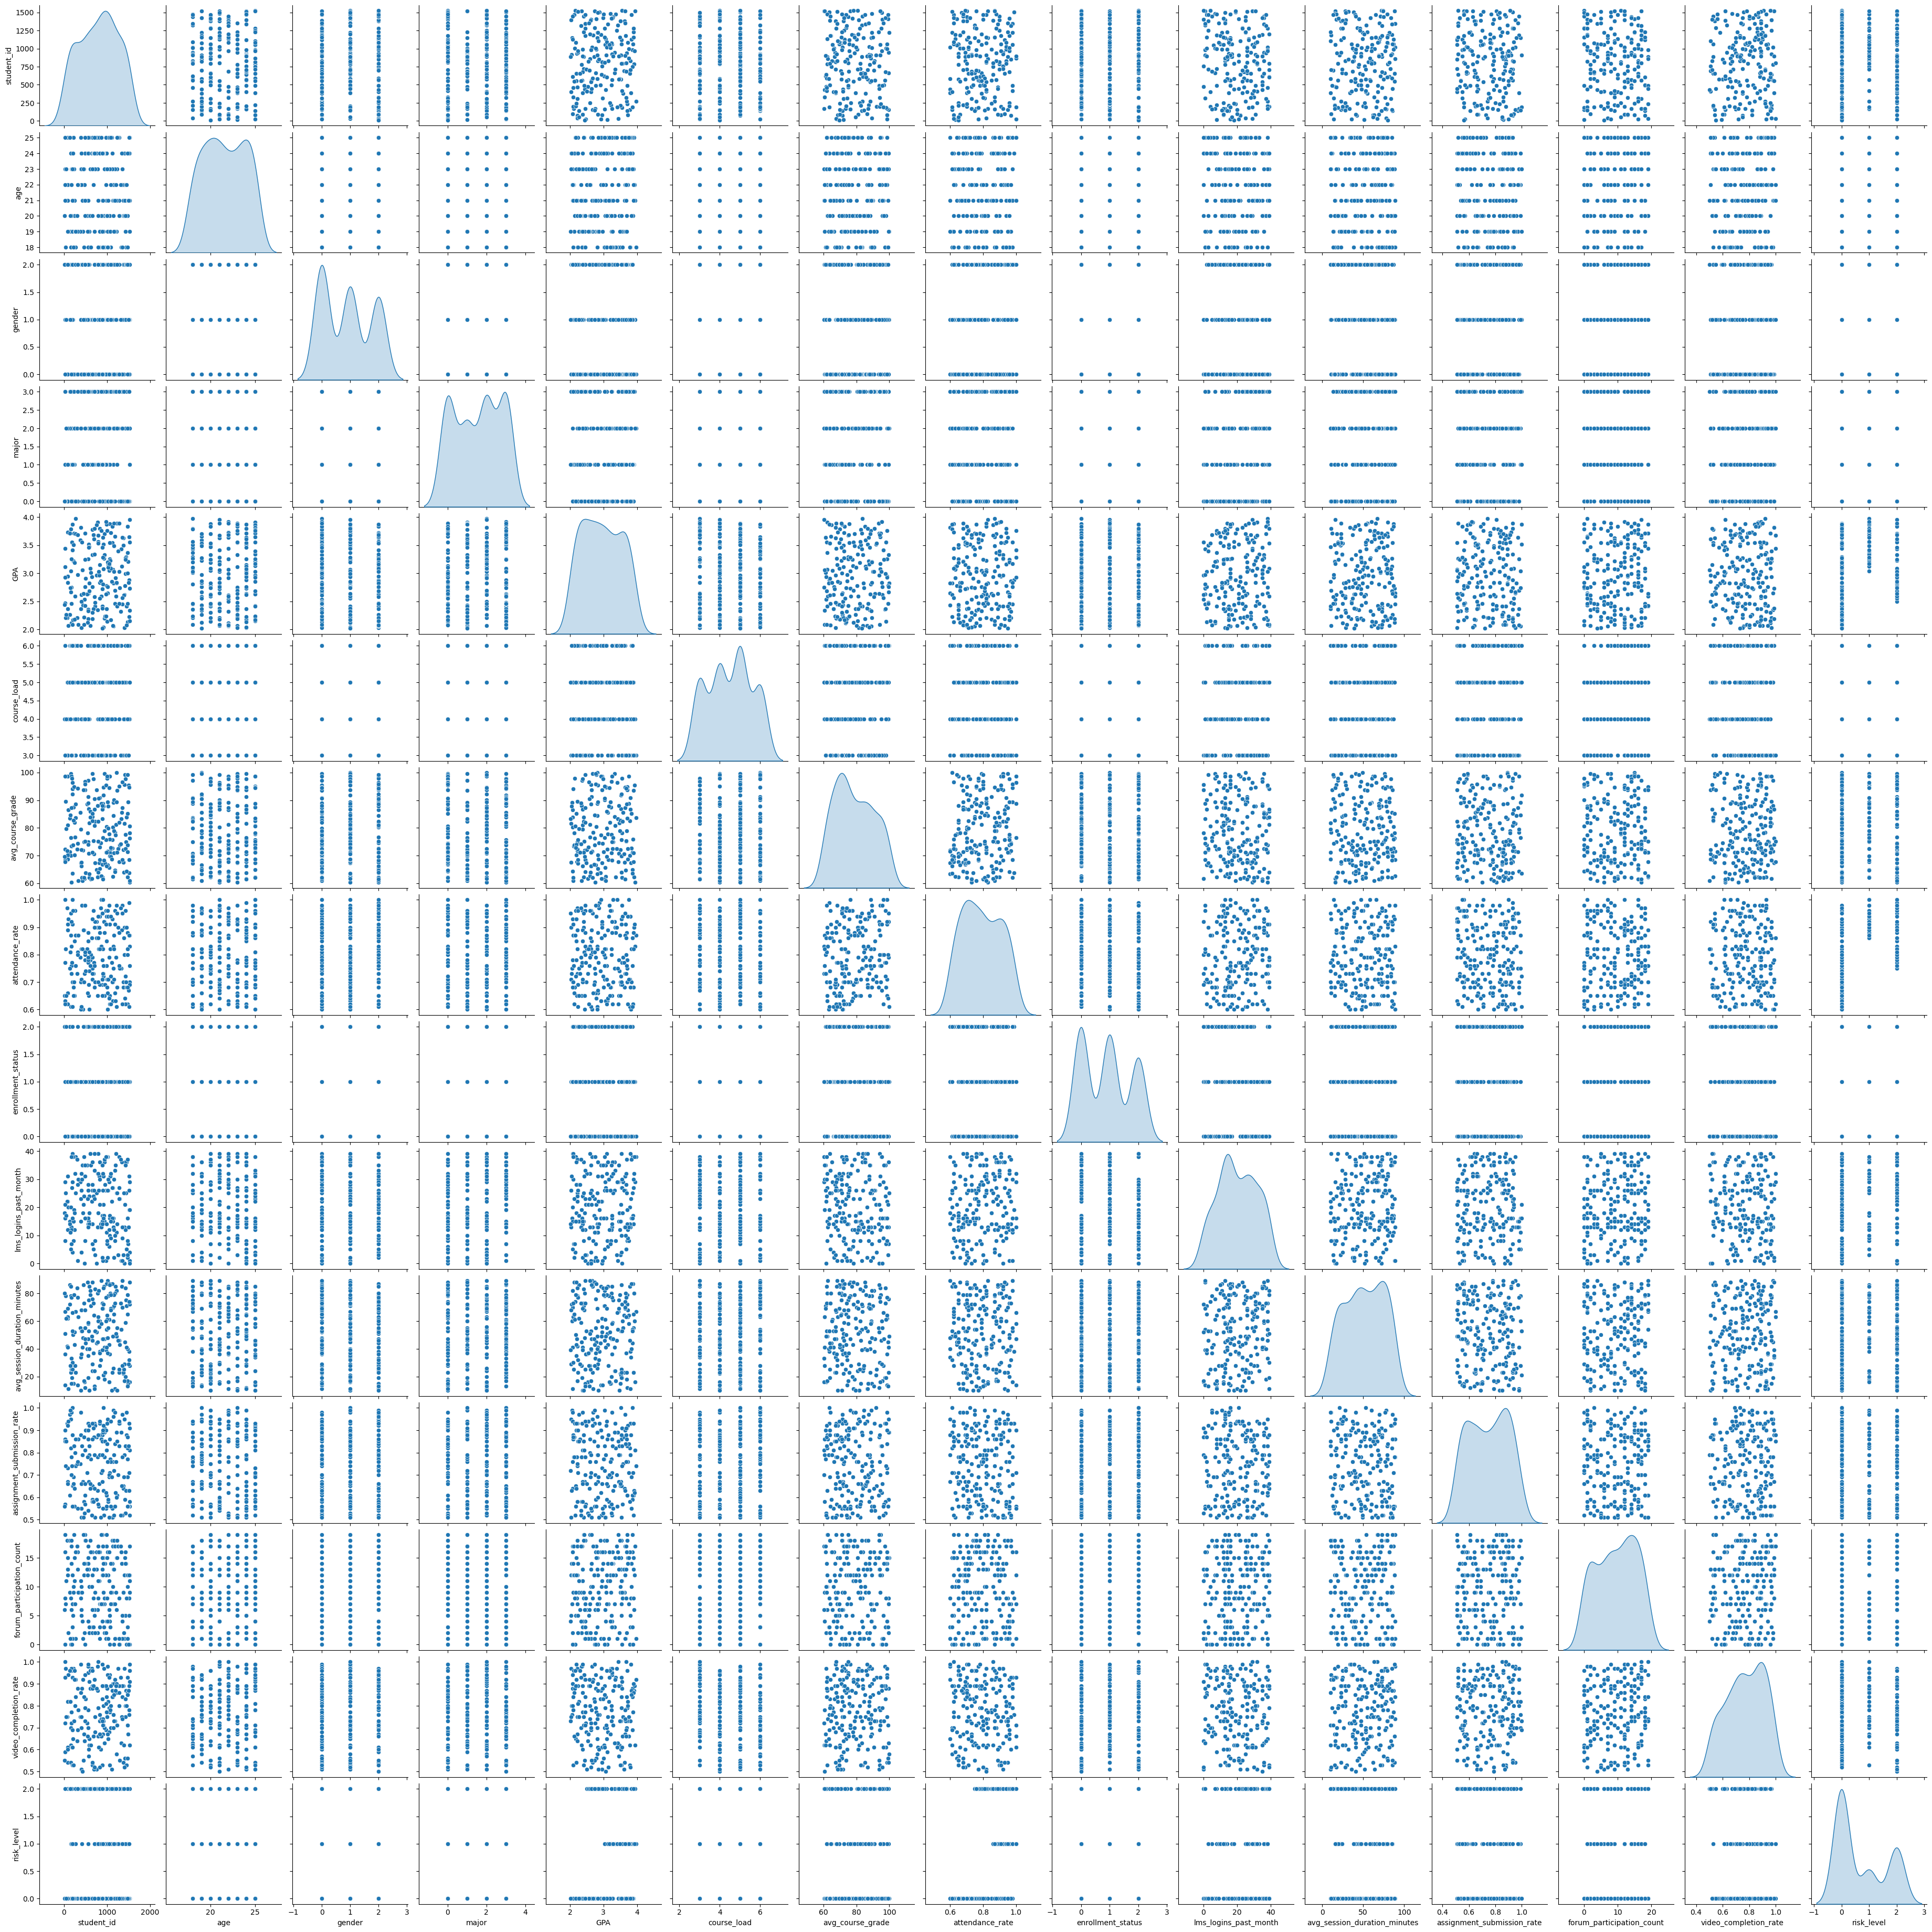

In [19]:
sns.pairplot(df.sample(min(200,len(df))),diag_kind='kde')
plt.show()

In [20]:
x=df.drop(target_col,axis=1)
y=df[target_col]

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [55]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [62]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
accuracy_score(y_test,lr_pred)

0.7734627831715211

In [68]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
accuracy_score(y_test,dt_pred)

1.0

In [72]:
rf=RandomForestClassifier(n_estimators=300,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
accuracy_score(y_test,rf_pred)

0.9967637540453075

In [74]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      0.98      0.99        57
           2       0.99      1.00      0.99        91

    accuracy                           1.00       309
   macro avg       1.00      0.99      1.00       309
weighted avg       1.00      1.00      1.00       309



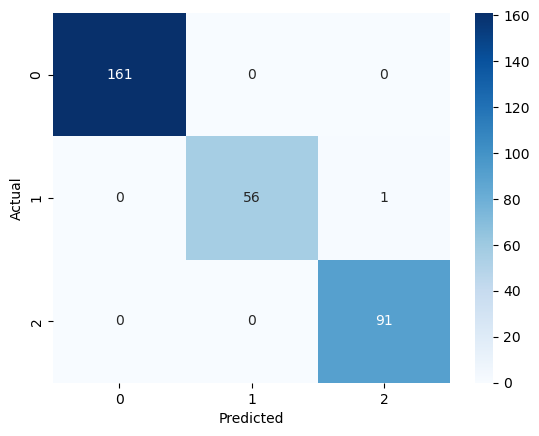

In [78]:
cm=confusion_matrix(y_test,rf_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
scores=cross_val_score(rf,x,y,cv=5)
scores.mean()

0.9980582524271846

In [88]:
rf.fit(x,y)
accuracy_score(y,rf.predict(x))

1.0